In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [15]:
hours = np.random.randint(1, 20, 100)
print(hours)

[15  3 19  7 10 14 15 11  2 13  8 18 17  5  9  2  4  5  5 13 18 10 19 17
  6  9  8 12 17 16 12  1  4 15 16  6 14 19  5 13 11  6 14 13  5  9  1 18
 13 16  8  7 11  8  5 11  5 13  2  4 15 14 16  2  7  1 18 15 10  5  2 16
  8 18  1 17  9  2 11 17  8  8  5 14  5 12 15 17 13 10  5  7 14 14  8 12
  8  7 18  3]


In [16]:
grades = 5 * hours + np.random.normal(0, 5, 100)
print(grades)

[ 72.95397566  12.33591676  93.06358078  37.67480278  49.89023444
  75.19462679  75.9658278   59.45831396  14.24240822  63.027554
  34.85656619  90.50026335  83.58856472  29.48580347  56.36974488
   6.40037081  14.63104912  27.52168303  23.54216835  55.74053172
  94.39101422  51.05745555  91.58936343  85.37425982  31.88303487
  47.17674194  49.38829292  61.06591055  87.47377915  79.92548059
  68.05848861   2.12173223  21.38192278  67.28427917  92.67516563
  27.48080183  77.02307218  95.91076324  23.28961067  70.6150143
  49.2604098   44.50072603  69.11618105  64.35571953  29.03960337
  46.65412695  -2.07528206  85.885219    74.91669068  83.28845043
  38.98360876  29.98154012  52.12508278  39.93773054  27.97390088
  59.41333408  25.90184828  62.24335863   4.13749901  17.35441028
  84.69985431  64.78719147  79.65965995   8.24772633  39.62880247
  11.22962691  88.78457489  75.58052352  37.33390322  28.23807017
  13.17966752  73.29011762  35.62024774  99.47487165   1.16157713
  80.25410607

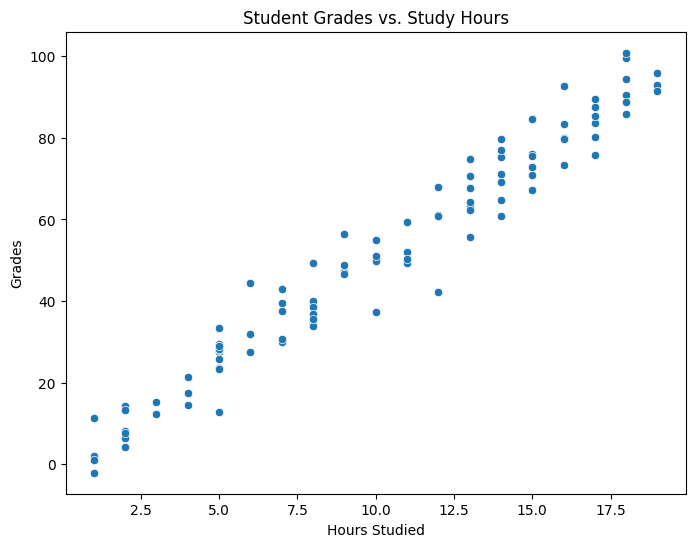

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=hours, y=grades)
plt.title('Student Grades vs. Study Hours')
plt.xlabel('Hours Studied')
plt.ylabel('Grades')
plt.show()

In [ ]:
# Chia dữ liệu thành tập huấn luyện (80%) và tập kiểm tra (20%)
hours_train = hours[:80]
grades_train = grades[:80]
hours_test = hours[80:]
grades_test = grades[80:]

In [21]:
from sklearn.linear_model import LinearRegression
# tao mô hình hồi quy tuyến tính
grade_predictor = LinearRegression()
# huấn luyện mô hình
grade_predictor.fit(hours_train.reshape(-1, 1), grades_train)
# xac định hệ số và intercept
a = grade_predictor.coef_[0]
b = grade_predictor.intercept_
print(f'Hệ số a: {a}, Intercept b: {b}')

Hệ số a: 5.064334778212689, Intercept b: -0.13259617291068082


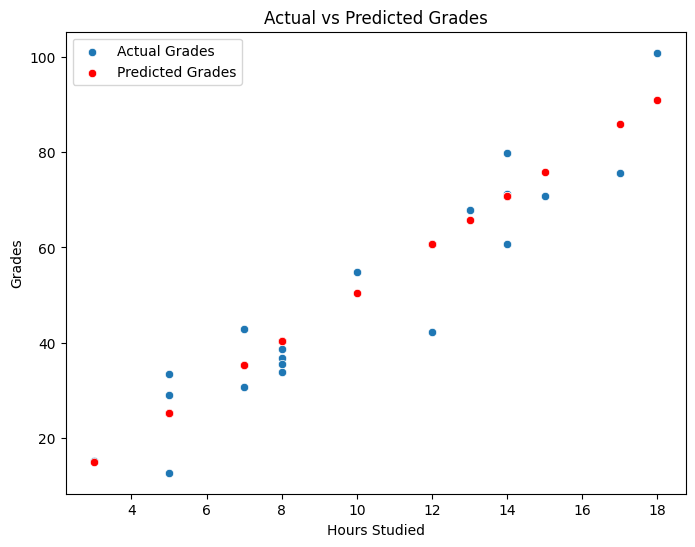

In [22]:
grade_test_pred = grade_predictor.predict(hours_test.reshape(-1, 1))
plt.figure(figsize=(8, 6))
sns.scatterplot(x=hours_test, y=grades_test, label='Actual Grades')
sns.scatterplot(x=hours_test, y=grade_test_pred, color='red', label='Predicted Grades')
plt.title('Actual vs Predicted Grades')
plt.xlabel('Hours Studied')
plt.ylabel('Grades')
plt.legend()
plt.show()

In [23]:
r2 = grade_predictor.score(hours_test.reshape(-1, 1), grades_test)
print(f'R-squared on test set: {r2}')
mse = np.mean((grades_test - grade_test_pred) ** 2)
print(f'Mean Squared Error on test set: {mse}')

R-squared on test set: 0.8848531373186306
Mean Squared Error on test set: 58.515026705590756


In [24]:
df = pd.read_csv('data_simple_reg.csv')
df.head()

,TT,Quang_Cao,Tiep_Thi,Online,Doanh_So
0,0,12.0,5.993562,3.730133,79.732757
1,1,13.0,6.741511,3.006753,71.677897
2,2,41.0,15.405956,2.987338,175.177829
3,3,78.0,28.294987,6.934639,323.246340
4,4,11.0,6.663944,1.633811,81.594181


In [26]:
df.info()
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TT         4572 non-null   int64  
 1   Quang_Cao  4562 non-null   float64
 2   Tiep_Thi   4568 non-null   float64
 3   Online     4566 non-null   float64
 4   Doanh_So   4566 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 178.7 KB
<class 'pandas.core.frame.DataFrame'>
Index: 4546 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TT         4546 non-null   int64  
 1   Quang_Cao  4546 non-null   float64
 2   Tiep_Thi   4546 non-null   float64
 3   Online     4546 non-null   float64
 4   Doanh_So   4546 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 213.1 KB


In [27]:
x_qc = df['Quang_Cao']
y_ds = df['Doanh_So']

In [28]:
x_qc_train = x_qc[:90]
y_ds_train = y_ds[:90]
x_qc_test = x_qc[90:]
y_ds_test = y_ds[90:]

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
x_qc_train, x_qc_test, y_ds_train, y_ds_test = train_test_split(x_qc, y_ds, test_size=0.1, random_state=42)

In [32]:
print(x_qc_train.shape, x_qc_test.shape, y_ds_train.shape, y_ds_test.shape)

(4091,) (455,) (4091,) (455,)


In [34]:
print(x_qc_train[:10])

915     45.0
1698    86.0
3311    20.0
802     85.0
3649    71.0
3322    49.0
970     10.0
1808     8.0
3108    90.0
2711    51.0
Name: Quang_Cao, dtype: float64


In [35]:
model = LinearRegression()
model.fit(x_qc_train.values.reshape(-1, 1), y_ds_train.values)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [36]:
a = model.coef_[0]
b = model.intercept_
print(f'Hệ số a: {a}, Intercept b: {b}')

Hệ số a: 3.5219106687772053, Intercept b: 42.85844014743918


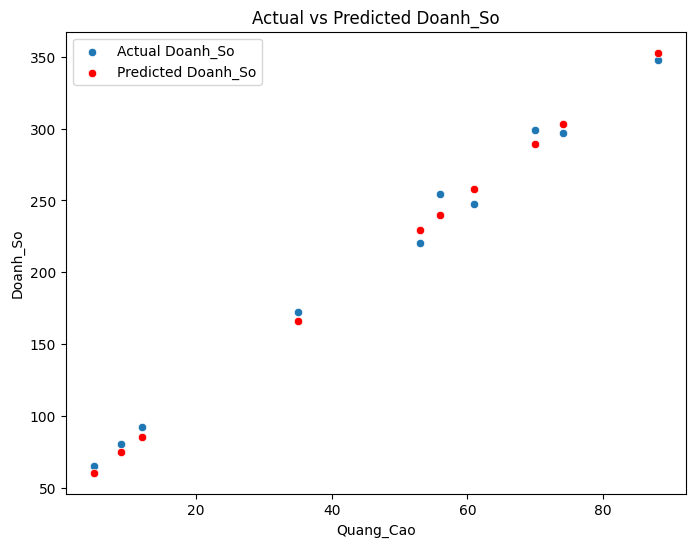

In [37]:
y_ds_pred = model.predict(x_qc_test.values.reshape(-1, 1))
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x_qc_test[:10], y=y_ds_test[:10], label='Actual Doanh_So')
sns.scatterplot(x=x_qc_test[:10], y=y_ds_pred[:10], color='red', label='Predicted Doanh_So')
plt.title('Actual vs Predicted Doanh_So')
plt.xlabel('Quang_Cao')
plt.ylabel('Doanh_So')
plt.legend()
plt.show()

In [38]:
r2 = r2_score(y_ds_test, y_ds_pred)
mse = mean_squared_error(y_ds_test, y_ds_pred)
print(f'R-squared on test set: {r2}')
print(f'Mean Squared Error on test set: {mse}')

R-squared on test set: 0.9863987385668086
Mean Squared Error on test set: 107.5586452019035


In [39]:
df = pd.read_csv('data_multiple_reg.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TT         572 non-null    int64  
 1   Quang_Cao  572 non-null    object 
 2   PR         572 non-null    float64
 3   Online     572 non-null    float64
 4   KOL        572 non-null    object 
 5   Doanh_So   572 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 26.9+ KB


In [40]:
y = df['Doanh_So']
x = df[['PR', 'Online']]
print(x.shape, y.shape)

(572, 2) (572,)


In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [42]:
a = model.coef_
b = model.intercept_
print(f'Hệ số a: {a}, Intercept b: {b}')

Hệ số a: [7.79729743 1.53478793], Intercept b: 72.4879777058083


In [43]:
y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'R-squared on test set: {r2}')
print(f'Mean Squared Error on test set: {mse}')

R-squared on test set: 0.621810090863957
Mean Squared Error on test set: 2961.9895308759833


In [46]:
qc_encoded = pd.get_dummies(df['Quang_Cao'])
qc_encoded.head()

,High,Low,Medium-High,Medium-Low
0,False,True,False,False
1,False,True,False,False
2,True,False,False,False
3,False,False,True,False
4,True,False,False,False


In [47]:
# tao 1 biến mới gồm PR, Online và Quang_Cao đã được mã hóa
x = pd.concat([qc_encoded, df[['PR', 'Online']]], axis=1)
x.head()

,High,Low,Medium-High,Medium-Low,PR,Online
0,False,True,False,False,1.034766,4.297423
1,False,True,False,False,5.340160,0.744989
2,True,False,False,False,21.918056,0.004401
3,False,False,True,False,20.288928,0.688838
4,True,False,False,False,30.048338,7.365014


In [48]:
print(x.shape, y.shape)

(572, 6) (572,)


In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [50]:
a = model.coef_
b = model.intercept_
print(f'Hệ số a: {a}, Intercept b: {b}')

Hệ số a: [ 80.67102349 -82.57129165  24.84463974 -22.94437158   2.20205675
   0.67667531], Intercept b: 179.53127575835356


In [51]:
y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'R-squared on test set: {r2}')
print(f'Mean Squared Error on test set: {mse}')

R-squared on test set: 0.9201077693745618
Mean Squared Error on test set: 625.7172520849919


In [53]:
df = pd.read_csv('data_logistic_reg.csv')
df.info()
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 4 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   TT                    129880 non-null  int64  
 1   Danh_Gia              129880 non-null  object 
 2   Chat_Luong_Tai_Xe     129880 non-null  int64  
 3   Thoi_Gian_vs_Du_Kien  129487 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 4.0+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 129487 entries, 0 to 129879
Data columns (total 4 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   TT                    129487 non-null  int64  
 1   Danh_Gia              129487 non-null  object 
 2   Chat_Luong_Tai_Xe     129487 non-null  int64  
 3   Thoi_Gian_vs_Du_Kien  129487 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 4.9+ MB


In [55]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Danh_Gia'] = encoder.fit_transform(df['Danh_Gia'])
df['Danh_Gia'].head()
df['Danh_Gia'].unique()

array([1, 0])

In [57]:
x = df[['Chat_Luong_Tai_Xe', 'Thoi_Gian_vs_Du_Kien']]
y = df['Danh_Gia']
print(x.shape, y.shape)

(129487, 2) (129487,)


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
model = LogisticRegression()
model.fit(x_train, y_train)

/Users/tungdt/Library/Python/3.13/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/tungdt/Library/Python/3.13/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/tungdt/Library/Python/3.13/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [64]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'Accurarcy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1: {f1}')

Accurarcy: 0.80206965788864
Precision: 0.8148984198645598
Recall: 0.8219723922015084
F1: 0.818420120439249


/Users/tungdt/Library/Python/3.13/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/tungdt/Library/Python/3.13/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/tungdt/Library/Python/3.13/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
